In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches

print("✅ Todas as bibliotecas foram importadas com sucesso!")

✅ Todas as bibliotecas foram importadas com sucesso!


# 1 Importando a Tabela

In [7]:
base = pd.read_csv(r"D:\PosFIAP\ArquivosTC4\Obesity.csv", sep=',')
base.head(10)

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


## 1.1 Informações básicas

In [8]:
base.describe().round(2)

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.00,2111.00,2111.00,2111.00,2111.00,2111.00,2111.00,2111.00
mean,24.31,1.70,86.59,2.42,2.69,2.01,1.01,0.66
std,6.35,0.09,26.19,0.53,0.78,0.61,0.85,0.61
min,14.00,1.45,39.00,1.00,1.00,1.00,0.00,0.00
25%,19.95,1.63,65.47,2.00,2.66,1.58,0.12,0.00
50%,22.78,1.70,83.00,2.39,3.00,2.00,1.00,0.63
75%,26.00,1.77,107.43,3.00,3.00,2.48,1.67,1.00
max,61.00,1.98,173.00,3.00,4.00,3.00,3.00,2.00


In [9]:
# Vamos renomear as colunas
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   object 
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  Obesity         2111 non-null   object 
dtypes: float64(8), object(9)
memory u

In [10]:
# Pelo menos não temos colunas com dados nulos
base.isnull().sum()

Gender            0
Age               0
Height            0
Weight            0
family_history    0
FAVC              0
FCVC              0
NCP               0
CAEC              0
SMOKE             0
CH2O              0
SCC               0
FAF               0
TUE               0
CALC              0
MTRANS            0
Obesity           0
dtype: int64

## 1.2 Tratando a base

### 1.2.1 Renomeando as colunas

In [11]:
# renomeando as colunas
base.rename(columns={
    'Gender':'genero',
    'Age':'idade',
    'Height':'altura',
    'Weight':'peso',
    'family_history':'historico_familiar',
    'FAVC':'calorias_frequente',
    'FCVC':'vegetais_refeicao',
    'NCP':'refeicoes_diaria',
    'CAEC':'entre_refeicao',
    'SMOKE':'fuma',
    'CH2O':'litros_agua',
    'SCC':'monitora_calorias',
    'FAF':'frequencia_atividade',
    'TUE':'tempo_tecnologia',
    'CALC':'frequencia_alcool',
    'MTRANS':'transporte_usado',
    'Obesity':'nvl_obsidade'
}, inplace = True)

In [12]:
base.head()

,genero,idade,altura,peso,historico_familiar,calorias_frequente,vegetais_refeicao,refeicoes_diaria,entre_refeicao,fuma,litros_agua,monitora_calorias,frequencia_atividade,tempo_tecnologia,frequencia_alcool,transporte_usado,nvl_obsidade
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


### 1.2.2 Adicionando IMC

In [13]:
# Não vamos transformar essa coluna em um label por dois motivos. Ela tecnicamente já está na nossa base e ela com esse valores pode ajudar o algoritmo a calcular melhor
base['imc'] = (base['peso'] / (base['altura']**2) ).round(2)
base['imc']

0       24.39
1       24.24
2       23.77
3       26.85
4       28.34
        ...  
2106    44.90
2107    43.74
2108    43.54
2109    44.07
2110    44.14
Name: imc, Length: 2111, dtype: float64

### 1.2.3 Colocando labels

In [14]:
# Temos algumas variáveis que são string, dito isso elas são repostas limitas, então vamos colacar labels nelas para possivelmente usá-las no algoritmo
genero = base['genero'].unique()
historico_familiar = base['historico_familiar'].unique()
calorias_frequente = base['calorias_frequente'].unique()
entre_refeicao = base['entre_refeicao'].unique()
fuma = base['fuma'].unique()
frequencia_alcool = base['frequencia_alcool'].unique()
transporte_usado = base['transporte_usado'].unique()
nvl_obsidade = base['nvl_obsidade'].unique()

# Repostas binárias
print("Respostas genero: ", genero)
print("Respostas histórico familiar: ", historico_familiar)
print("Respostas consome calorias com frequência: ", calorias_frequente)
print("Respostas se fuma: ", fuma)


#Respostas com grau entre elas (maior ou menor que a outra)
print("Respostas come entre refeições: ", entre_refeicao)
print("Respostas bebe alcool com frequência: ", frequencia_alcool)
print("Respostas obesidade: ", nvl_obsidade)

#Resposta sem relação (teoricamente tem uma relação, uma é melhor poderia ser melhor que a outra, mas a diferença é mais difícil de ver, então achei melhor considerar sem)
print("Respostas qual transporte usado: ", transporte_usado)

Respostas genero:  ['Female' 'Male']
Respostas histórico familiar:  ['yes' 'no']
Respostas consome calorias com frequência:  ['no' 'yes']
Respostas se fuma:  ['no' 'yes']
Respostas come entre refeições:  ['Sometimes' 'Frequently' 'Always' 'no']
Respostas bebe alcool com frequência:  ['no' 'Sometimes' 'Frequently' 'Always']
Respostas obesidade:  ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']
Respostas qual transporte usado:  ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']


In [15]:
# Vamos usar algumas técnicas para colocar labels nas variáveis, dessa forma podemos tentar aproveitar melhor as características de cada uma

# Label Encoding, como são respostas binárias esse método é simples e já vai ajudar
le = LabelEncoder()
colunas = ['historico_familiar','calorias_frequente', 'fuma']
for col in colunas:
    base[(f"{col}_cod")] = le.fit_transform(base[col])

# Vamos aplicar a mesma lógica para genero também, mas como são outras respostas é melhor usar outro enconder
le = LabelEncoder()
base['genero_cod'] =  le.fit_transform(base['genero'])
 
# base[['genero', 'historico_familiar','calorias_frequente', 'fuma', 'genero_cod','historico_familiar_cod','calorias_frequente_cod', 'fuma_cod']].head(20) # caso queira validar



In [16]:
# Ordinal encoding, para as variáveis que tem uma relação de "melhor e pior" entre si
ordem = [['no', 'Sometimes', 'Frequently', 'Always']] #define ordem que de "valor", do menor para o maior
ordem_cat = OrdinalEncoder(categories=ordem, handle_unknown='use_encoded_value', unknown_value=-1)

base['entre_refeicao_ord'] = ordem_cat.fit_transform(base[['entre_refeicao']])
base['frequencia_alcool_ord'] = ordem_cat.fit_transform(base[['frequencia_alcool']])


# Agora aplicamos a mesma lógica para a questão de obesidade
ordem = [['Insufficient_Weight', 'Normal_Weight','Overweight_Level_I', 'Overweight_Level_II','Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']]
ordem_cat = OrdinalEncoder(categories=ordem, handle_unknown='use_encoded_value', unknown_value=-1)

base['nvl_obsidade_ord'] = ordem_cat.fit_transform(base[['nvl_obsidade']])

# base[['nvl_obsidade', 'entre_refeicao', 'nvl_obsidade_ord', 'entre_refeicao_ord']] #caso queira validar


In [17]:
# Vamos aplicar o one-hot coding para a de transportes. Como não há uma relação entre elas e são poucas variáveis é uma boa opção
base = pd.get_dummies(base, columns=["transporte_usado"], prefix="transporte", drop_first=False)


base.head(5) #para validação

,genero,idade,altura,peso,historico_familiar,calorias_frequente,vegetais_refeicao,refeicoes_diaria,entre_refeicao,fuma,...,fuma_cod,genero_cod,entre_refeicao_ord,frequencia_alcool_ord,nvl_obsidade_ord,transporte_Automobile,transporte_Bike,transporte_Motorbike,transporte_Public_Transportation,transporte_Walking
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,...,0,0,1.0,0.0,1.0,False,False,False,True,False
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,...,1,0,1.0,1.0,1.0,False,False,False,True,False
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,...,0,1,1.0,2.0,1.0,False,False,False,True,False
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,...,0,1,1.0,2.0,2.0,False,False,False,False,True
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,...,0,1,1.0,1.0,3.0,False,False,False,True,False


# 2 Analise da base

## 2.1 Utils

In [18]:
# Lista de colunas para ficar mais fácil de selecionar
"""
'genero',
 'idade',
 'altura',
 'peso',
 'historico_familiar',
 'calorias_frequente',
 'vegetais_refeicao',
 'refeicoes_diaria',
 'entre_refeicao',
 'fuma',
 'litros_agua',
 'monitora_calorias',
 'frequencia_atividade',
 'tempo_tecnologia',
 'frequencia_alcool',
 'transporte_usado',
 'nvl_obsidade',
 'imc',
 'historico_familiar_cod',
 'calorias_frequente_cod',
 'fuma_cod',
 'genero_cod',
 'entre_refeicao_ord',
 'frequencia_alcool_ord',
 'nvl_obsidade_ord',
 'transporte_Automobile',
 'transporte_Bike',
 'transporte_Motorbike',
 'transporte_Public_Transportation',
 'transporte_Walking',
"""
# Deixo uma lista de colunas que podem ser usada para o algoritmo pronto para faciliar alguns processos a frente
colunas_usaveis = [
     'idade',
 'altura',
 'peso',
 'vegetais_refeicao',
 'refeicoes_diaria',
 'litros_agua',
 'frequencia_atividade',
 'tempo_tecnologia',
 'imc',
 'historico_familiar_cod',
 'calorias_frequente_cod',
 'fuma_cod',
 'genero_cod',
 'entre_refeicao_ord',
 'frequencia_alcool_ord',
 'nvl_obsidade_ord',
 'transporte_Automobile',
 'transporte_Bike',
 'transporte_Motorbike',
 'transporte_Public_Transportation',
 'transporte_Walking'
]

## 2.2 Analisando correlação das variáveis com a target

In [19]:
corr = base[colunas_usaveis].corr()

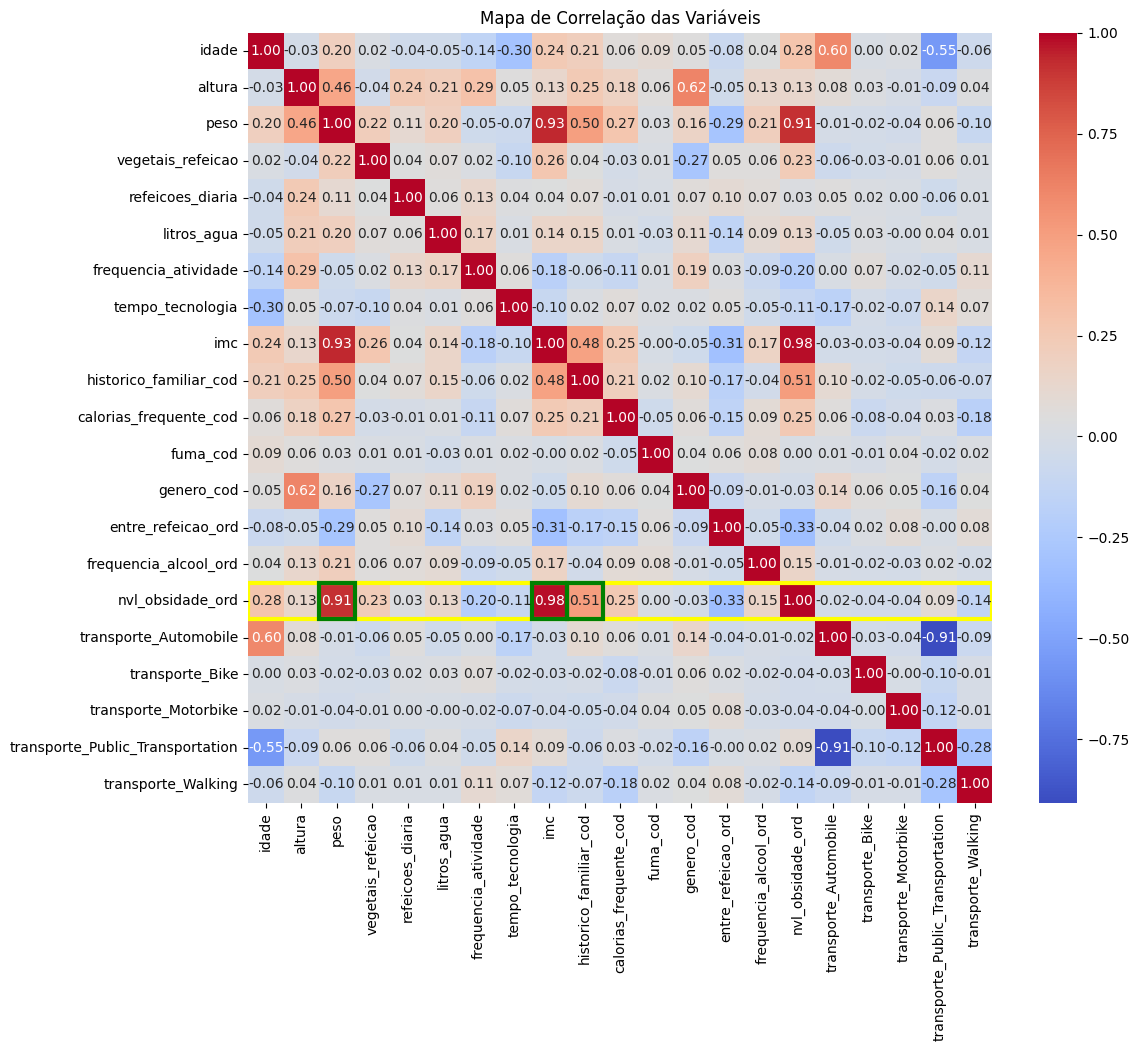

In [20]:
plt.figure(figsize=(12,10))
ax = sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de Correlação das Variáveis")

pontos = [(2,15), (8,15), (9,15)] 

rect = patches.Rectangle((0,15), 21,1, fill=False, edgecolor='yellow', lw=3) #adiciona uma ajuda visual para a nossa target
ax.add_patch(rect)

for i in range(len(pontos)):
    rect = patches.Rectangle(pontos[i], 1,1, fill=False, edgecolor='green', lw=3) #adiciona uma ajuda visual para a nossa target
    ax.add_patch(rect)

plt.show()

# 3 Algoritmo RandomForest

In [21]:
x = base[['peso','imc','historico_familiar_cod']]
y = base['nvl_obsidade_ord']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [23]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Criamos listas para que a vizualização fique mais amigável
labels = [0,1,2,3,4,5,6]
nomes = ['Insufficient_Weight', 'Normal_Weight','Overweight_Level_I', 'Overweight_Level_II','Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']

# Considerando os dados e o que estamos tentando avaliar não é surpresa que o algoritmo não tenhoa problemas em ter uma acurácia boas
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, labels = labels, target_names = nomes))

                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.96      0.98        56
      Normal_Weight       0.93      1.00      0.96        62
 Overweight_Level_I       1.00      0.91      0.95        56
Overweight_Level_II       0.96      1.00      0.98        50
     Obesity_Type_I       1.00      0.97      0.99        78
    Obesity_Type_II       0.93      0.95      0.94        58
   Obesity_Type_III       0.95      0.97      0.96        63

           accuracy                           0.97       423
          macro avg       0.97      0.97      0.97       423
       weighted avg       0.97      0.97      0.97       423



Teste